In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

import os
from os import path, getcwd, listdir, mkdir
import torch as t

import sys
sys.path.insert(0, '../../fhn_model')
from diffusion_gumbel import diffuse_STE
from reaction_diff import  rho_STE
from tqdm import tqdm

In [2]:
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "Helvetica"
mpl.rcParams["font.size"] = 12
mpl.rcParams["text.latex.preamble"] = "\\usepackage{amssymb} \n \\usepackage{color}"

In [3]:
param_trace = np.load("./data/param_trace.npy")
print(param_trace.shape)

(3, 5601)


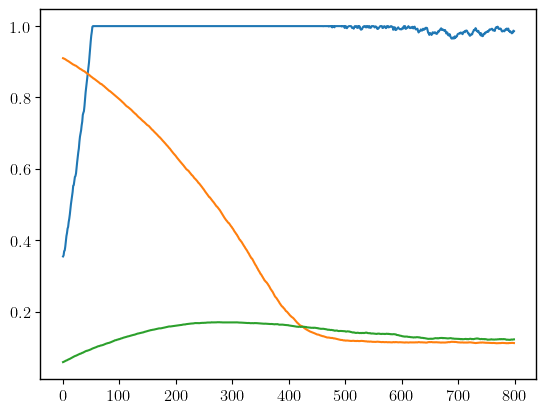

In [4]:
num_steps = 800
stepcounter = np.arange(num_steps)
plt.plot(stepcounter, param_trace[0, :num_steps])
plt.plot(stepcounter, param_trace[1, :num_steps])
plt.plot(stepcounter, param_trace[2, :num_steps])

In [5]:
results = np.load("./data/results.npy")
results.shape
df = pd.DataFrame(results)

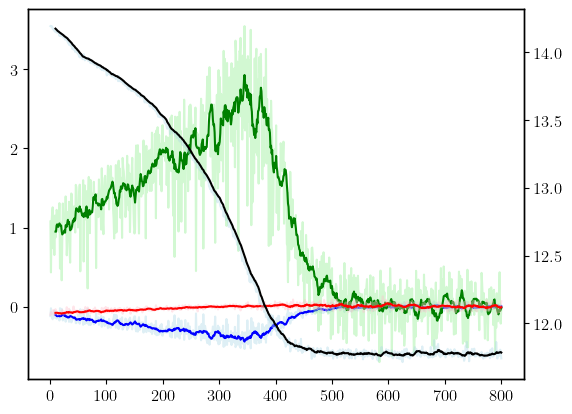

In [6]:
plt.plot(df.iloc[1, 1:num_steps+1], 'lightblue', alpha=0.4)
plt.plot(df.iloc[1, 1:num_steps+1].rolling(10).mean(), 'b')
plt.plot(df.iloc[2, 1:num_steps+1], 'lightgreen', alpha=0.4)
plt.plot(df.iloc[2, 1:num_steps+1].rolling(10).mean(), 'g')
plt.plot(df.iloc[3, 1:num_steps+1], 'pink', alpha=0.4)
plt.plot(df.iloc[3, 1:num_steps+1].rolling(10).mean(), 'r')

axs2 = plt.twinx()

axs2.plot(df.iloc[0, 1:num_steps+1], 'lightblue', alpha=0.4)
axs2.plot(df.iloc[0, 1:num_steps+1].rolling(10).mean(), "black")

In [7]:
def remove_ticklines(ax):
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

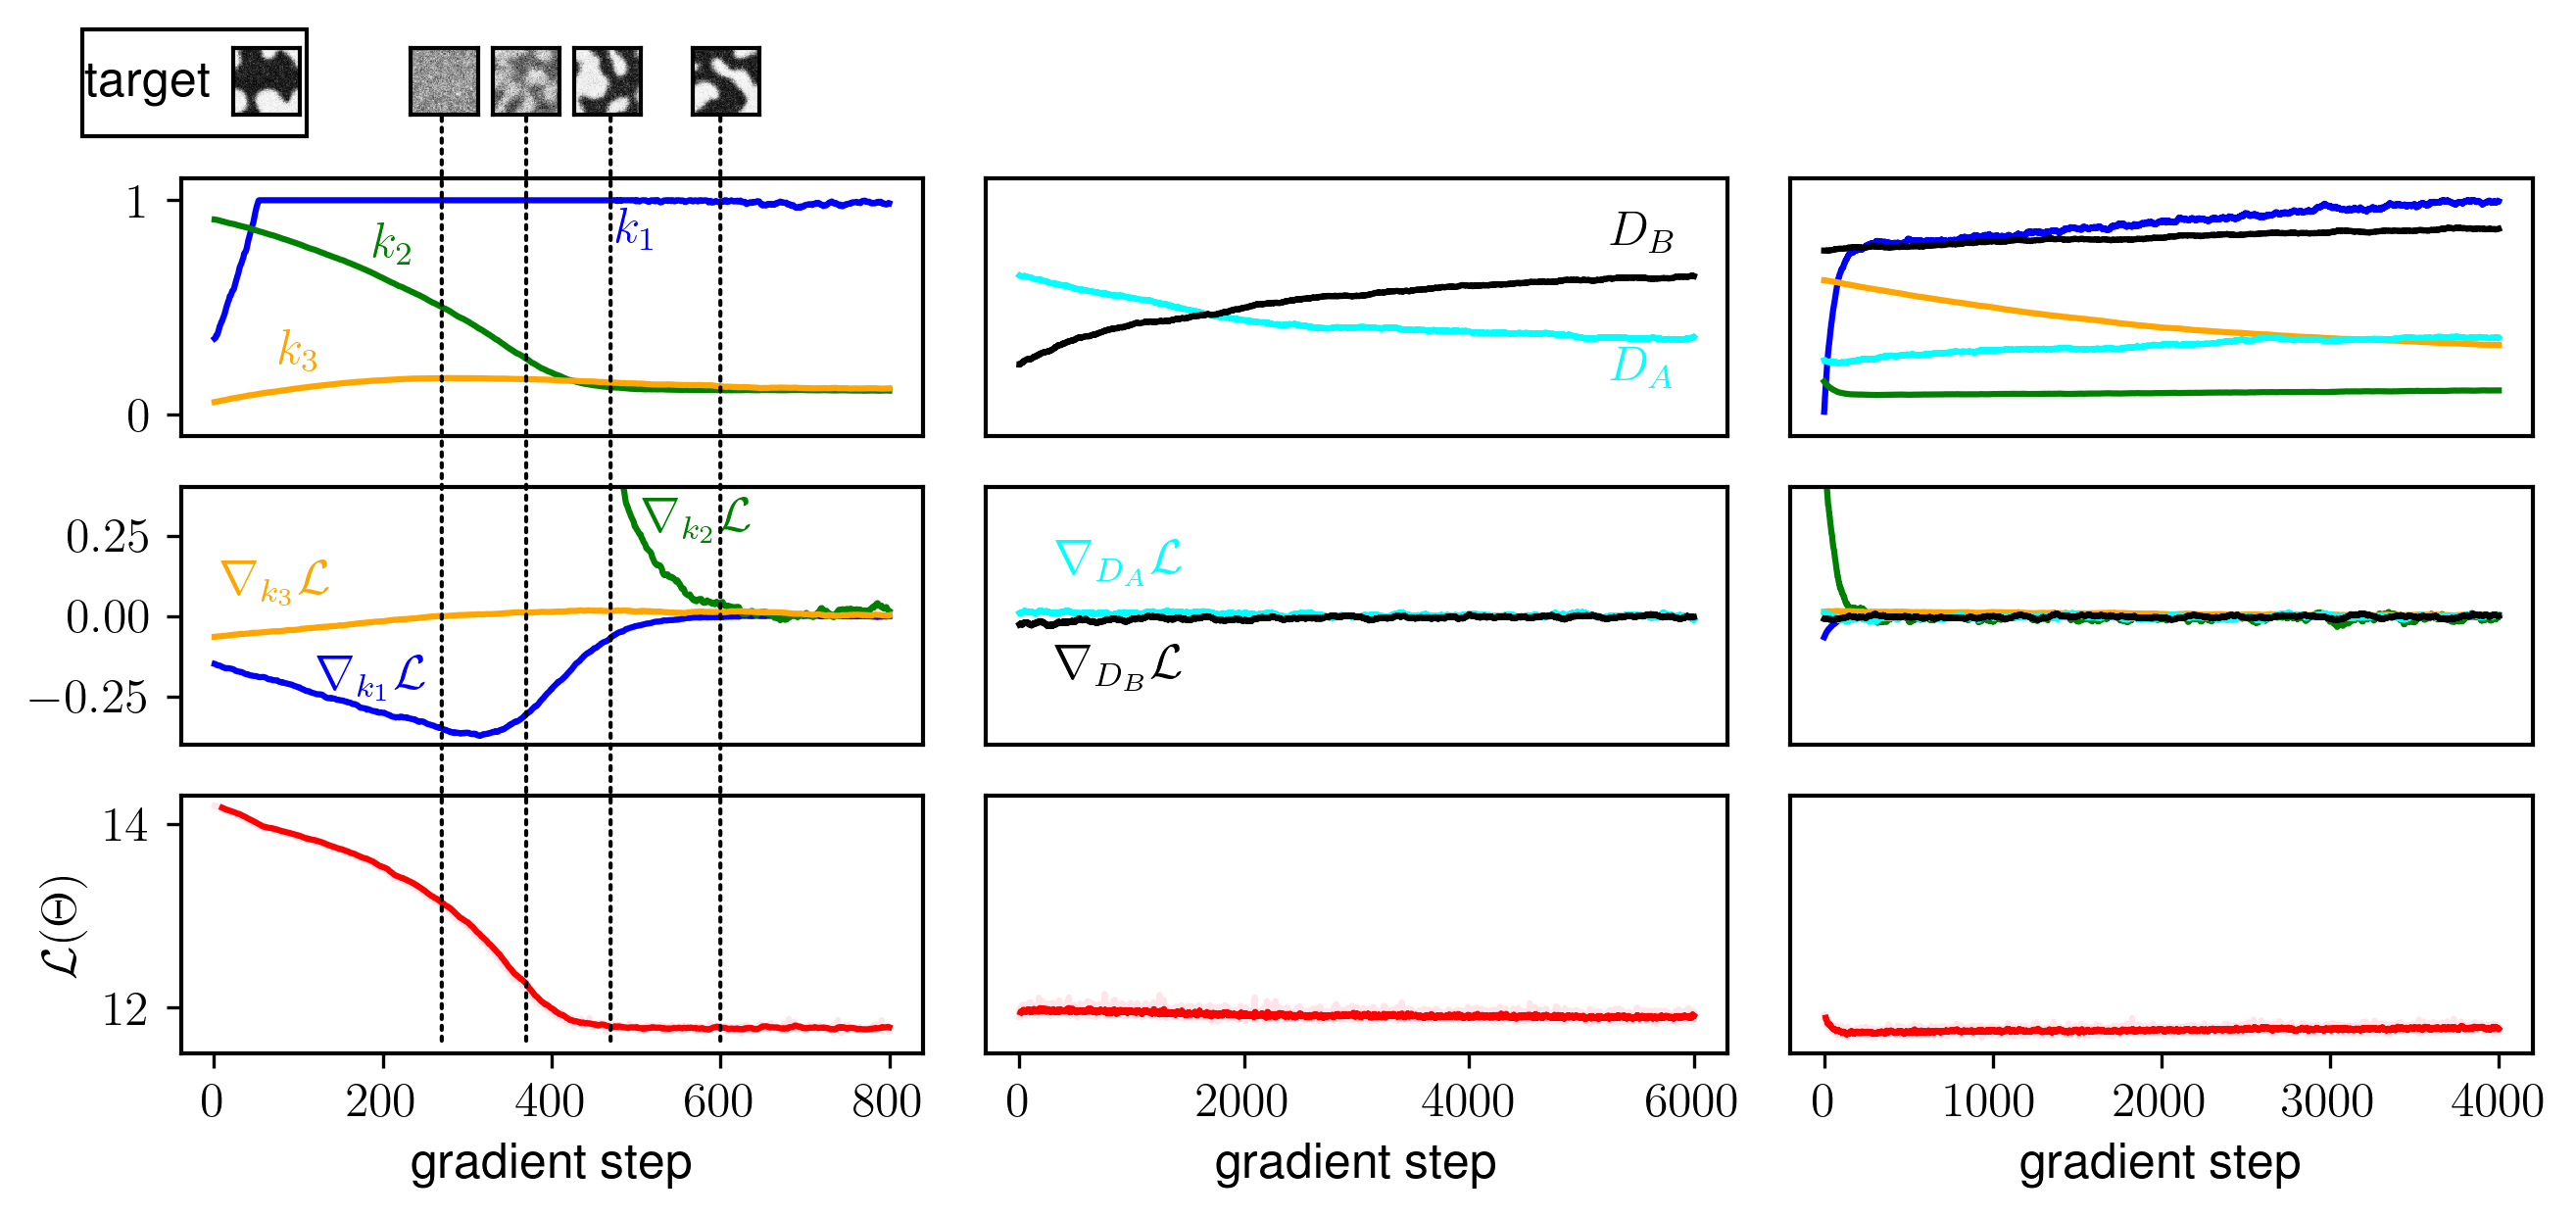

In [133]:
num_steps = 800
fig = plt.figure(layout='constrained', figsize=(8,3.5), dpi=300)
subfigs = fig.subfigures(1, 3, wspace=0.08)

lhs = subfigs[0]

axs_top_left = lhs.add_axes([0,0.6,1,0.25])
axs_top_left.plot(stepcounter, param_trace[0, :num_steps], "b")
axs_top_left.annotate(
    "$k_1$",
    (500, param_trace[0,499]),
    textcoords="offset points", # how to position the text
    xytext=(0,-10), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="b"
)
axs_top_left.plot(stepcounter, param_trace[1, :num_steps], "g")
axs_top_left.annotate(
    "$k_2$",
    (250, param_trace[1,249]),
    textcoords="offset points", # how to position the text
    xytext=(-8.0,10), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="g"
)
axs_top_left.plot(stepcounter, param_trace[2, :num_steps], "orange")
axs_top_left.annotate(
    "$k_3$",
    (100, param_trace[2,99]),
    textcoords="offset points", # how to position the text
    xytext=(0,6), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="orange"
)
for tic in axs_top_left.xaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)
axs_top_left.set_ylim(-0.1,1.1)


axs_bot_left = lhs.add_axes([0,0.3,1,0.25])
#axs_bot_left.plot(df.iloc[1, 1:num_steps+1], 'lightblue', alpha=0.4)
axs_bot_left.plot(df.iloc[1, 1:num_steps+1].rolling(100).mean(), 'b', label=r"$\nabla_{k_1}\mathcal{L}$")
#axs_bot_left.plot(df.iloc[2, 1:num_steps+1], 'lightgreen', alpha=0.4)
axs_bot_left.plot(df.iloc[2, 1:num_steps+1].rolling(100).mean(), 'g', label=r"$\nabla_{k_2}\mathcal{L}$")
#axs_bot_left.plot(df.iloc[3, 1:num_steps+1], 'navajowhite', alpha=0.4)
axs_bot_left.plot(df.iloc[3, 1:num_steps+1].rolling(100).mean(), 'orange', label=r"$\nabla_{k_3}\mathcal{L}$")
for tic in axs_bot_left.xaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)
#axs_bot_left.set_yscale("symlog")
axs_bot_left.set_ylim(-0.4,0.4)
axs_bot_left.annotate(
    r"$\nabla_{k_1}\mathcal{L}$",
    (200, df.iloc[1,199]),
    textcoords="offset points", # how to position the text
    xytext=(15.0,10.5), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="blue"
)
axs_bot_left.annotate(
    r"$\nabla_{k_2}\mathcal{L}$",
    (550, df.iloc[2,549]),
    textcoords="offset points", # how to position the text
    xytext=(12.0,7.5), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="green"
)
axs_bot_left.annotate(
    r"$\nabla_{k_3}\mathcal{L}$",
    (100, df.iloc[3,99]),
    textcoords="offset points", # how to position the text
    xytext=(15.0,5.5), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="orange"
)


axs_bot_bot = lhs.add_axes([0,0,1,0.25])
axs_bot_bot.plot(df.iloc[0, 1:num_steps+1], 'pink', alpha=0.4)
axs_bot_bot.plot(df.iloc[0, 1:num_steps+1].rolling(10).mean(), "red")
#axs2.annotate(
#    r"",
#    (175, results[0,175]),
#    textcoords="offset points", # how to position the text
#    xytext=(-7,8), # distance from text to points (x,y)
#    ha='center', # horizontal alignment can be left, right or center
#)
#axs_bot_left.text(650,0.08, r"$\nabla_{k_1}\mathcal{L}$", color="blue")
#axs_bot_left.text(650,0.06, r"$\nabla_{k_2}\mathcal{L}$", color="green")
#axs_bot_left.text(650,0.04, r"$\nabla_{k_3}\mathcal{L}$", color="orange")
#axs2.set_ylabel(r"$\mathcal{L}(k1,k2,k3)$", color="red")
#axs2.tick_params(axis='y', labelcolor="red")
axs_bot_bot.set_xlabel("gradient step")
axs_bot_bot.set_ylim(11.5,14.3)



grid_reference = t.load("./data/0.pt", map_location=t.device('cpu'))
pattern_ref = lhs.add_axes([0.07,0.9,0.09,0.09])
pattern_ref.imshow(grid_reference[0],cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(pattern_ref)
pattern_ref.add_patch(
    mpl.patches.Rectangle((-145,-18), 215.5, 102, fill=False, clip_on=False)
)

grid_start = np.load("./data/inference/270.npy")
pattern_start = lhs.add_axes([0.31,0.9,0.09,0.09])
pattern_start.imshow(grid_start[0,0],cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(pattern_start)

grid_2 = np.load("./data/inference/370.npy")
pattern_2= lhs.add_axes([0.42,0.9,0.09,0.09])
pattern_2.imshow(grid_2[0,0],cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(pattern_2)

grid_3 = np.load("./data/inference/450.npy")
pattern_3= lhs.add_axes([0.53,0.9,0.09,0.09])
pattern_3.imshow(grid_3[0,0],cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(pattern_3)

grid_4 = np.load("./data/inference/600.npy")
pattern_4= lhs.add_axes([0.69,0.9,0.09,0.09])
pattern_4.imshow(grid_4[0,0],cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(pattern_4)

axs_bot_bot.annotate('',
    (270,11.5),
    (270,21.9),
    arrowprops=dict({
        'arrowstyle': "-",
        'linestyle': "dotted"
    }),
    annotation_clip=False,
)

axs_bot_bot.annotate('',
    (370,11.5),
    (370,21.9),
    arrowprops=dict({
        'arrowstyle': "-",
        'linestyle': "dotted"
    }),
    annotation_clip=False,
)

axs_bot_bot.annotate('',
    (470,11.5),
    (470,21.9),
    arrowprops=dict({
        'arrowstyle': "-",
        'linestyle': "dotted"
    }),
    annotation_clip=False,
)

axs_bot_bot.annotate('',
    (600,11.5),
    (600,21.9),
    arrowprops=dict({
        'arrowstyle': "-",
        'linestyle': "dotted"
    }),
    annotation_clip=False,
)

#axs_bot_bot.text(0,12.8, r"$\mathcal{L}(k_1,k_2,k_3)$", color="red")
axs_bot_bot.set_ylabel(r"$\mathcal{L}(\Theta)$")
lhs.text(-0.13,0.93,"target")

######################################################
###                                                ###
###     Results for Optimization of DA and DB      ###
###                                                ###
######################################################

results_path = path.join(getcwd(), "data_da_db")
rhs = subfigs[1]

num_steps = 6000

DA_vals = np.load(path.join(results_path, "DA_vals.npy"))
DB_vals = np.load(path.join(results_path, "DB_vals.npy"))
axs_param = rhs.add_axes([0,0.6,1,0.25])
axs_param.plot(DA_vals[:num_steps], "cyan")
axs_param.plot(DB_vals[:num_steps], "black")
for tic in axs_param.xaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)
axs_param.set_ylim(-0.1,1.1)
remove_ticklines(axs_param)
axs_param.annotate(
    r"$D_A$",
    (5000, DA_vals[4999]),
    textcoords="offset points", # how to position the text
    xytext=(15.0,-10.5), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="cyan"
)
axs_param.annotate(
    r"$D_B$",
    (5000, DB_vals[4999]),
    textcoords="offset points", # how to position the text
    xytext=(15.0,8.5), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="black"
)

grads_DA = np.load(path.join(results_path, "grads_DA.npy"))
grads_DA = pd.DataFrame(grads_DA)
grads_DB = np.load(path.join(results_path, "grads_DB.npy")) 
grads_DB = pd.DataFrame(grads_DB)
axs_grads = rhs.add_axes([0,0.3,1,0.25])
#axs_grads.plot(grads_DA.iloc[:num_steps], "lightblue", alpha=0.4)
axs_grads.plot(grads_DA.iloc[:num_steps].rolling(100).mean(), 'cyan')
#axs_grads.plot(grads_DB.iloc[:num_steps], "gray", alpha=0.4)
axs_grads.plot(grads_DB.iloc[:num_steps].rolling(100).mean(), 'black')
#for tic in axs_grads.xaxis.get_major_ticks():
#    tic.tick1line.set_visible(False)
#    tic.tick2line.set_visible(False)
#    tic.label1.set_visible(False)
#    tic.label2.set_visible(False)
axs_grads.set_ylim(-0.4,0.4)
remove_ticklines(axs_grads)
axs_grads.annotate(
    r"$\nabla_{D_A}\mathcal{L}$",
    (550, grads_DA.iloc[549]),
    textcoords="offset points", # how to position the text
    xytext=(12.0,7.5), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="cyan"
)
axs_grads.annotate(
    r"$\nabla_{D_B}\mathcal{L}$",
    (550, grads_DB.iloc[549]),
    textcoords="offset points", # how to position the text
    xytext=(12.0,-13.5), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="black"
)
    
losses_da_db = np.load(path.join(results_path, "losses.npy"))
losses_da_db = pd.DataFrame(losses_da_db)
axs_losses = rhs.add_axes([0,0.,1,0.25])
axs_losses.plot(losses_da_db.iloc[:num_steps], "pink", alpha=0.4)
axs_losses.plot(losses_da_db.iloc[:num_steps].rolling(10).mean(), 'red')
axs_losses.set_xlabel("gradient step")
axs_losses.set_ylim(11.5,14.3)
for tic in axs_losses.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)


######################################################
###                                                ###
###   Results for Optimization of K1,K2,K3,DA,DB   ###
###                                                ###
###################################################### 
results_k123_da_db_path = path.join(getcwd(), "data_k123_da_db")
rrhs = subfigs[2]

num_steps = 4000

k1_vals_joint = np.load(path.join(results_k123_da_db_path, "k1_vals.npy"))
k2_vals_joint = np.load(path.join(results_k123_da_db_path, "k2_vals.npy"))
k3_vals_joint = np.load(path.join(results_k123_da_db_path, "k3_vals.npy"))
DA_vals_joint = np.load(path.join(results_k123_da_db_path, "DA_vals.npy"))
DB_vals_joint = np.load(path.join(results_k123_da_db_path, "DB_vals.npy"))
axs_params_all = rrhs.add_axes([0,0.6,1,0.25])
axs_params_all.plot(k1_vals_joint[:num_steps], "blue")
axs_params_all.plot(k2_vals_joint[:num_steps], "green")
axs_params_all.plot(k3_vals_joint[:num_steps], "orange")
axs_params_all.plot(DA_vals_joint[:num_steps], "cyan")
axs_params_all.plot(DB_vals_joint[:num_steps], "black")
#for tic in axs_params_all.xaxis.get_major_ticks():
#    tic.tick1line.set_visible(False)
#    tic.tick2line.set_visible(False)
#    tic.label1.set_visible(False)
#    tic.label2.set_visible(False)
axs_params_all.set_ylim(-0.1,1.1)
remove_ticklines(axs_params_all)

grads_k1_joint = np.load(path.join(results_k123_da_db_path, "grads_k1.npy"))
grads_k1_joint = pd.DataFrame(grads_k1_joint)
grads_k2_joint = np.load(path.join(results_k123_da_db_path, "grads_k2.npy"))
grads_k2_joint = pd.DataFrame(grads_k2_joint)
grads_k3_joint = np.load(path.join(results_k123_da_db_path, "grads_k3.npy"))
grads_k3_joint = pd.DataFrame(grads_k3_joint)    
grads_DA_joint = np.load(path.join(results_k123_da_db_path, "grads_DA.npy"))
grads_DA_joint = pd.DataFrame(grads_DA_joint)
grads_DB_joint = np.load(path.join(results_k123_da_db_path, "grads_DB.npy")) 
grads_DB_joint = pd.DataFrame(grads_DB_joint)
axs_grads = rrhs.add_axes([0,0.3,1,0.25])
#axs_grads.plot(grads_k1_joint.iloc[:num_steps], "lightblue", alpha=0.2)
axs_grads.plot(grads_k1_joint.iloc[:num_steps].rolling(100).mean(), 'blue')
#axs_grads.plot(grads_k2_joint.iloc[:num_steps], "lightgreen", alpha=0.2)
axs_grads.plot(grads_k2_joint.iloc[:num_steps].rolling(100).mean(), 'green')
#axs_grads.plot(grads_k3_joint.iloc[:num_steps], "navajowhite", alpha=0.2)
axs_grads.plot(grads_k3_joint.iloc[:num_steps].rolling(100).mean(), 'orange')
#axs_grads.plot(grads_DA_joint.iloc[:num_steps], "plum", alpha=0.4)
axs_grads.plot(grads_DA_joint.iloc[:num_steps].rolling(100).mean(), 'cyan')
#axs_grads.plot(grads_DB_joint.iloc[:num_steps], "gray", alpha=0.4)
axs_grads.plot(grads_DB_joint.iloc[:num_steps].rolling(100).mean(), 'black')
#for tic in axs_grads.xaxis.get_major_ticks():
#    tic.tick1line.set_visible(False)
#    tic.tick2line.set_visible(False)
#    tic.label1.set_visible(False)
#    tic.label2.set_visible(False)
remove_ticklines(axs_grads)
axs_grads.set_ylim(-0.4,0.4)

losses = np.load(path.join(results_k123_da_db_path, "losses.npy"))
losses = pd.DataFrame(losses)
axs_losses_joint = rrhs.add_axes([0,0,1,0.25])
axs_losses_joint.plot(losses.iloc[:num_steps], "pink", alpha=0.4)
axs_losses_joint.plot(losses.iloc[:num_steps].rolling(10).mean(), "red")
axs_losses_joint.set_ylim(11.5,14.3)
axs_losses_joint.set_xlabel("gradient step")
for tic in axs_losses_joint.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)

plt.show()

# Inferences for Experiment 1

In [158]:
N = 50
num_steps = 50_000
DA = t.tensor(0.1)
DB = t.tensor(0.4)
gamma = 0.005

steps = [260, 270, 280, 290]

for step in steps:
    k1 = k1_bar = t.tensor(param_trace[0, step])
    k2 = k2_bar = t.tensor(param_trace[1, step])
    k3 = k3_bar = t.tensor(param_trace[2, step])
    
    X = t.zeros((1, 2, 64, 64))
    X[:] = 25
    X[0, 29:35] = 40
    
    for sim_step in tqdm(range(num_steps)):
        # run the diffusion step
        X = diffuse_STE(X, N, DA, DB)
        # run the reaction step
        X = rho_STE(X, N, gamma, k1, k1, k2, k2, k3, k3)
    
    np.save(f"./data/inference/{step}.npy", X.numpy())
    

100%|██████████| 50000/50000 [04:59<00:00, 166.73it/s]


# Inferences for Experiment 2

In [ ]:
k1 = t.tensor(0.98)
k2 = t.tensor(0.1)
k3 = t.tensor(0.2)
N = 50
gamma = 0.005
num_steps = 50_000